# Práctica 2 - Fundamentos de aprendizaje automático
____
* Pablo Marcos
* Dionisio Pérez


### Apartado 1 - KNN

In [56]:
# Imports
import matplotlib.pyplot as plt
import numpy as np


from Clasificador import ClasificadorVecinosProximos, Clasificador
from Datos import Datos
from EstrategiaParticionado import ValidacionCruzada
from AnalisisRoc import curva_roc, matriz_confusion
from plotModel import plotModel

En primer lugar cargaremos todos los datasets en un array para utilizarlos con los diferentes ejemplos sin cargarlos varias veces.

In [53]:

datasets = []
dataset_names = ('example1','example2','example3','example4','wdbc')


for name in dataset_names:
    datasets.append(Datos("../ConjuntosDatos/{}.data".format(name)))

Para cada uno de los datasets variaremos el número de vecinos realizando una validación cruzada para calcular el número óptimo de vecinos. También calcularemos con y sin normalización de datos para ver los diferentes resultados.

Por último mostraremos los resultados ploteando la frontera de decisión para el mejor K de cada uno de los datasets.

In [61]:
vecinos = (1, 3, 5, 11, 21, 51)
kfold = ValidacionCruzada(20) # Validacion cruzada con 20 k-folds

# Matriz para guardar los errores
errores_medios = np.empty((len(datasets), len(vecinos), 2))


for i, dataset in enumerate(datasets):
    
    clases = dataset[:,-1]
    
    
    for j, k in enumerate(vecinos):
        for l, normaliza in enumerate((True, False)):
            
            knn = ClasificadorVecinosProximos(k=k, normaliza=normaliza)
            errores = Clasificador.validacion(kfold, dataset, knn)
            errores_medios[i, j, l] = np.mean(errores)


In [69]:
for i, name in enumerate(dataset_names):
    print(name)
    print("K \ Normaliza | No normaliza")
    print(errores_medios[i])
    print()

example1
K \ Normaliza | No normaliza
[[0.17368421 0.18157895]
 [0.15526316 0.14210526]
 [0.16052632 0.15      ]
 [0.12894737 0.13947368]
 [0.13157895 0.15      ]
 [0.12894737 0.13157895]]

example2
K \ Normaliza | No normaliza
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

example3
K \ Normaliza | No normaliza
[[0.02631579 0.02631579]
 [0.03684211 0.03421053]
 [0.03157895 0.03684211]
 [0.02631579 0.02105263]
 [0.02368421 0.03157895]
 [0.02631579 0.02894737]]

example4
K \ Normaliza | No normaliza
[[0.     0.025 ]
 [0.     0.1125]
 [0.     0.1125]
 [0.     0.2   ]
 [0.     0.3875]
 [0.     0.55  ]]

wdbc
K \ Normaliza | No normaliza
[[0.0537037  0.08148148]
 [0.03518519 0.07407407]
 [0.02962963 0.06851852]
 [0.03148148 0.07037037]
 [0.0462963  0.07592593]
 [0.04814815 0.07962963]]



Observamos los errores medios obtenidos en la validación por cada ejemplo, la matriz imprimida se corresponde por columnas a normalizar o no normalizar y por filas la variación del número de vecinos.
La normalización no cambia significativamente los resultados, obviando el ejemplo 4,...

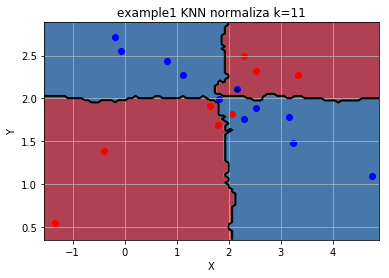

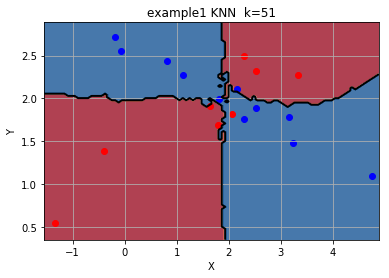

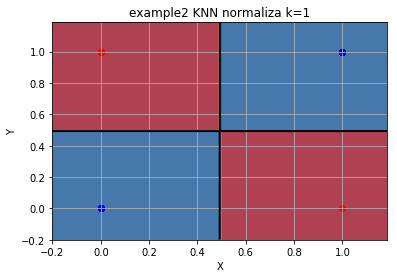

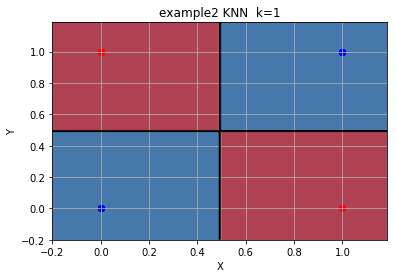

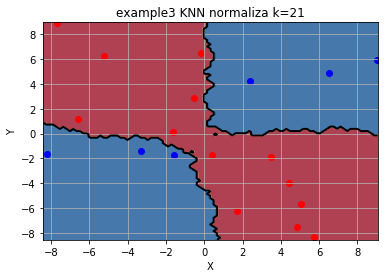

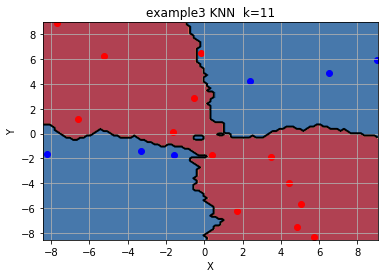

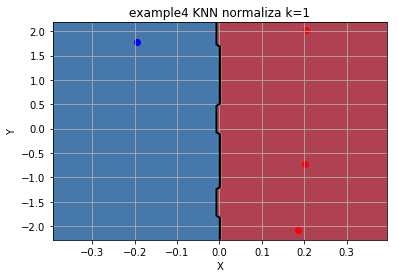

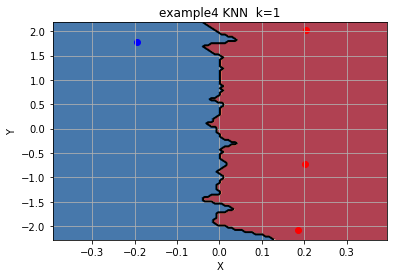

In [82]:


for i, name in enumerate(dataset_names[:-1]):
    particion = kfold(datasets[i])[0]
    for j, normaliza in enumerate((True, False)):
        k = vecinos[np.argmin(errores_medios[i,:,j])]
        knn = ClasificadorVecinosProximos(k=k, normaliza=normaliza)
        knn.entrenamiento(datasets[i], indices=particion.indicesTrain)
        idx = particion.indicesTest
        title = "{} KNN {} k={}".format(name, "normaliza" if normaliza else "", k)
        plotModel(datasets[i][idx,0],datasets[i][idx,1], datasets[i][idx,2], knn, title, datasets[i].diccionarios)
        plt.show()

Error:  0.0 %


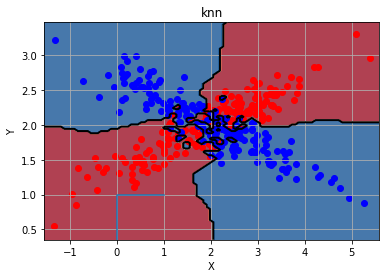

In [3]:



dataset = Datos("../ConjuntosDatos/example1.data",cast=float)
clases = dataset[:,-1]

knn = ClasificadorVecinosProximos(k=1 ,normaliza=True)
knn.entrenamiento(dataset)

pred = knn.clasifica(dataset[:,:-1])

#print(knn.est)
#print(pred != knn.datos[:,-1])
print("Error: ",100*Clasificador.error(knn.datos, pred),"%")

log = ClasificadorRegresionLogistica()
v = ValidacionSimple(19./20)
p = v(dataset)

idx =p[0].indicesTrain
#log.entrenamiento(dataset, indices=idx)

curva_roc(knn, dataset)


plotModel(dataset[idx][:,0],dataset[idx][:,1], dataset[idx][:,2], knn, "knn", dataset.diccionarios)

#pred = log.clasifica(dataset, indices=p[0].indicesTest)

#print(pred)
#print(clases[p[0].indicesTest])
#print(Clasificador.error(dataset[p[0].indicesTest], pred))
#print(log.w)
plt.show()


[-0.06727262 -6.20280207  0.0352666 ]
[-0.06727262 -6.20280207  0.0352666 ]
0.0


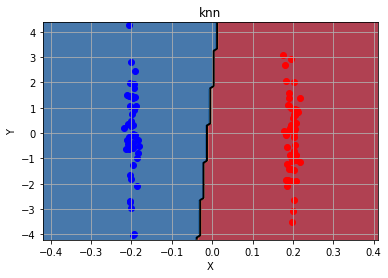

In [66]:

from Datos import Datos


from Clasificador import *
from EstrategiaParticionado import ValidacionSimple
import matplotlib.pyplot as plt

from AnalisisRoc import curva_roc, matriz_confusion
from plotModel import plotModel

dataset = Datos("../ConjuntosDatos/example4.data",cast=float)
clases = dataset[:,-1]


log = ClasificadorRegresionLogistica()
v = ValidacionSimple(19./20)
p = v(dataset)

idx =p[0].indicesTrain
log.entrenamiento(dataset, indices=idx)

#curva_roc(knn, dataset)


plotModel(dataset[idx][:,0],dataset[idx][:,1], dataset[idx][:,2], log, "knn", dataset.diccionarios)

pred = log.clasifica(dataset, indices=p[0].indicesTest)

#print(pred)
#print(clases[p[0].indicesTest])
print(Clasificador.error(dataset[p[0].indicesTest], pred))
#print(log.w)
plt.show()
